# CSE555 Lab 3 - Exact Inference with Probabilistic Graphical Models

# Part 1

### Importing libraries

In [0]:
import pgmpy
from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD
import numpy as np
import warnings
warnings.filterwarnings('ignore')

### Creating the Graph Models with all possible random variables and dependent variables as nodes.

In [0]:

chest_clinic_model = BayesianModel([('asia', 'tub'),
                                    ('tub', 'either'),
                                    ('smoke', 'lung'),
                                    ('smoke', 'bronc'),
                                    ('lung', 'either'),
                                    ('either', 'xray'),
                                    ('either', 'dysp'),
                                    ('bronc', 'dysp')])


### Assign the probability distributions to all nodes

In [0]:

cpd_asia = TabularCPD(variable='asia', variable_card = 2, values = [[0.01], [0.99]])

cpd_smoke = TabularCPD(variable='smoke', variable_card = 2, values = [[0.5], [0.5]])

cpd_tub = TabularCPD(variable='tub', variable_card=2, values=[[0.05, 0.01], 
                                                              [0.95, 0.99]], evidence = ['asia'], evidence_card = [2])

cpd_lung = TabularCPD(variable='lung', variable_card=2, values=[[0.1, 0.01], 
                                                              [0.9, 0.99]], evidence = ['smoke'], evidence_card = [2])

cpd_bronc = TabularCPD(variable='bronc', variable_card=2, values=[[0.6, 0.3], 
                                                              [0.4, 0.7]], evidence = ['smoke'], evidence_card = [2])

cpd_either = TabularCPD(variable='either', variable_card=2, values=[[1, 1, 1, 0], 
                                                              [0, 0, 0, 1]], evidence = ['tub', 'lung'], evidence_card = [2, 2])

cpd_xray = TabularCPD(variable='xray', variable_card=2, values=[[0.98, 0.05], 
                                                              [0.02, 0.95]], evidence = ['either'], evidence_card = [2])

cpd_dysp = TabularCPD(variable='dysp', variable_card=2, values=[[0.9, 0.7, 0.8, 0.1], 
                                                              [0.1, 0.3, 0.2, 0.9]], evidence = ['bronc', 'either'], evidence_card = [2, 2])


### Associating the parameters with the model structure

In [0]:
chest_clinic_model.add_cpds(cpd_asia, cpd_smoke, cpd_tub, cpd_lung, cpd_bronc, cpd_either, cpd_xray, cpd_dysp)

# Checking if the cpds are valid for the model. 
print('\n\nShow the accuracy of the construction of the model:')

print('\n\nIs the model built successfully (True/False)', chest_clinic_model.check_model())

print('\n\nIs tub and smoke an active network?(True/False)  ', chest_clinic_model.is_active_trail('tub', 'smoke'))
print('\n\nIs asia and smoke an active network?(True/False)  ', chest_clinic_model.is_active_trail('asia', 'smoke'))
print('\n\nIs either and bronc an active network?(True/False)  ',chest_clinic_model.is_active_trail('either', 'bronc'))
print('\n\nIs either and lung an active network?(True/False)   ',chest_clinic_model.is_active_trail('either', 'lung'))
print('\n\nIs either observed from tub and lung?(True/False)   ',chest_clinic_model.is_active_trail('tub', 'lung', observed=['either']))




Show the accuracy of the construction of the model:


Is the model built successfully (True/False) True


Is tub and smoke an active network?(True/False)   False


Is asia and smoke an active network?(True/False)   False


Is either and bronc an active network?(True/False)   True


Is either and lung an active network?(True/False)    True


Is either observed from tub and lung?(True/False)    True


### Checking whether the independencies are drawn correctly or not

In [0]:
print('\n\nShow all independent nodes of xray:\n')
chest_clinic_model.local_independencies('xray')



Show all independent nodes of xray:



(xray _|_ tub, bronc, dysp, smoke, asia, lung | either)

## Drawing the model graphs -Moralized, Triangulated and Junction Tree

In [0]:
import networkx as nx
import pylab as plt


### Drawing the normal Bayesian Network Model

All Edges in the Bayesian Network Model.

('asia', 'tub')
('tub', 'either')
('either', 'xray')
('either', 'dysp')
('smoke', 'lung')
('smoke', 'bronc')
('lung', 'either')
('bronc', 'dysp')


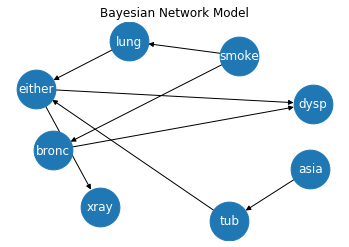

In [0]:
print('All Edges in the Bayesian Network Model.\n')
for edge in chest_clinic_model.edges():
    print(edge)
plt.figure()
plt.title('Bayesian Network Model')
nx.draw(chest_clinic_model, with_labels=True, node_size=1500, font_size=12, font_color='white')
plt.savefig('Bayesian.png')
plt.show()

### Moralizing the Bayesian Network Model and drawing it.



All edges of Moralized Graph:

('asia', 'tub')
('tub', 'either')
('tub', 'lung')
('either', 'xray')
('either', 'dysp')
('either', 'lung')
('either', 'bronc')
('lung', 'smoke')
('dysp', 'bronc')
('bronc', 'smoke')


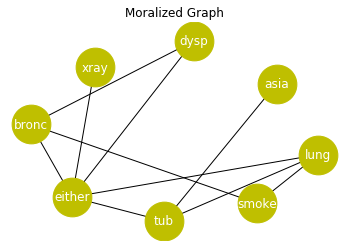

In [0]:
moralize = chest_clinic_model.to_markov_model()
print('\n\nAll edges of Moralized Graph:\n')
for edge in moralize.edges():
    print(edge)
plt.figure()
plt.title('Moralized Graph')
nx.draw(moralize, with_labels=True, node_color= 'y', node_size=1500, font_size=12, font_color='white')
plt.savefig('Moralize.png')
plt.show()

### Triangulating the moralized Bayesian model and drawing it. 



Edges of triangulated graph:

('asia', 'tub')
('asia', 'smoke')
('asia', 'xray')
('tub', 'either')
('tub', 'lung')
('tub', 'xray')
('tub', 'smoke')
('either', 'xray')
('either', 'dysp')
('either', 'lung')
('either', 'bronc')
('either', 'smoke')
('lung', 'smoke')
('lung', 'xray')
('xray', 'smoke')
('dysp', 'bronc')
('dysp', 'smoke')
('bronc', 'smoke')


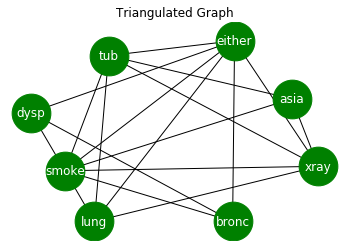

In [0]:
triangulated = moralize.triangulate()
print('\n\nEdges of triangulated graph:\n')
for edge in triangulated.edges():
    print(edge)
plt.figure()
plt.title('Triangulated Graph')
nx.draw(triangulated, with_labels=True, node_color= 'g', node_size=1500, font_size=12, font_color='white')
plt.savefig('Triangulate.png')
plt.show()

### Constructing a junction tree from the triangulated model and drawing it. 



Nodes in the Junction Tree:

('smoke', 'asia', 'tub', 'xray')
('smoke', 'either', 'xray', 'tub', 'lung')
('smoke', 'either', 'bronc', 'dysp')


Edges in the Junction Tree:

(('smoke', 'asia', 'tub', 'xray'), ('smoke', 'either', 'xray', 'tub', 'lung'))
(('smoke', 'either', 'xray', 'tub', 'lung'), ('smoke', 'either', 'bronc', 'dysp'))


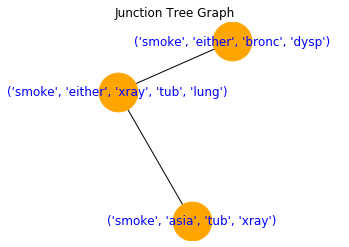

In [0]:
junc_tree = triangulated.to_junction_tree()
print('\n\nNodes in the Junction Tree:\n')
for node in junc_tree.nodes():
    print(node)

print('\n\nEdges in the Junction Tree:\n')    
for edge in junc_tree.edges():
    print(edge)
    
pos = nx.spring_layout(junc_tree)   
plt.figure()
plt.title('Junction Tree Graph')
nx.draw(junc_tree, with_labels=True, node_color= 'orange', node_size=1500, font_size=12, font_color='blue')
x_values, y_values = zip(*pos.values())
x_max = max(x_values)
x_min = min(x_values)
x_margin = (x_max - x_min) * 0.8
plt.xlim(x_min - x_margin, x_max + x_margin)
plt.savefig('juncTree.png')
plt.show()

In [0]:
junc_tree.nodes


NodeView((('smoke', 'asia', 'tub', 'xray'), ('smoke', 'either', 'xray', 'tub', 'lung'), ('smoke', 'either', 'bronc', 'dysp')))

## Satisfying the Running Intersection Property: 

According to the running intersection property of a junction tree, for each pair of clusters X and Y that contain a node i, each cluster on the unique path between X and Y should also contain i.

Thus, from the above drawn junction tree, we can see that the pair of clusters - 
##### {'smoke', 'asia', 'tub', 'xray'} 
and 
###### {'smoke', 'either', 'bronc', 'dysp'}, 
there exists another cluster - 
##### {'smoke', 'either', 'xray', 'tub', 'lung'} 
on the unique path between the pair of clusters that contains the common nodes - 
##### {'smoke'}. 

This satisfies the Running Intersection Property. 


# Part 2

#### Importing libraries.

In [0]:
from pgmpy.inference import VariableElimination, BeliefPropagation
import IPython
from IPython.display import Image

In [0]:

inference = VariableElimination(chest_clinic_model)
phi_Query = inference.query(variables=['tub', 'lung','bronc'],evidence={'asia': 0, 'xray': 0},joint = True)
print('Joint Probability for {tub, lung, bronc} for the given evidence is ' + str(phi_Query))


Eliminating: smoke: 100%|███████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 274.92it/s]


Joint Probability for {tub, lung, bronc} for the given evidence is +--------+---------+----------+-----------------------+
| tub    | lung    | bronc    |   phi(tub,lung,bronc) |
+========+=========+==========+=======================+
| tub(0) | lung(0) | bronc(0) |                0.0106 |
+--------+---------+----------+-----------------------+
| tub(0) | lung(0) | bronc(1) |                0.0079 |
+--------+---------+----------+-----------------------+
| tub(0) | lung(1) | bronc(0) |                0.1413 |
+--------+---------+----------+-----------------------+
| tub(0) | lung(1) | bronc(1) |                0.1778 |
+--------+---------+----------+-----------------------+
| tub(1) | lung(0) | bronc(0) |                0.2021 |
+--------+---------+----------+-----------------------+
| tub(1) | lung(0) | bronc(1) |                0.1508 |
+--------+---------+----------+-----------------------+
| tub(1) | lung(1) | bronc(0) |                0.1370 |
+--------+---------+----------+------

#### From the above displayed clusters, we can observe that the joint probabilites of {'tub', 'lung', 'bronc'} are 0.0106. 

The nodes of the Junction Tree are denoted as: asia(A),smoke(S),tub(T),xray(X),either(E),lung(L),bronc(B),dysp(D)



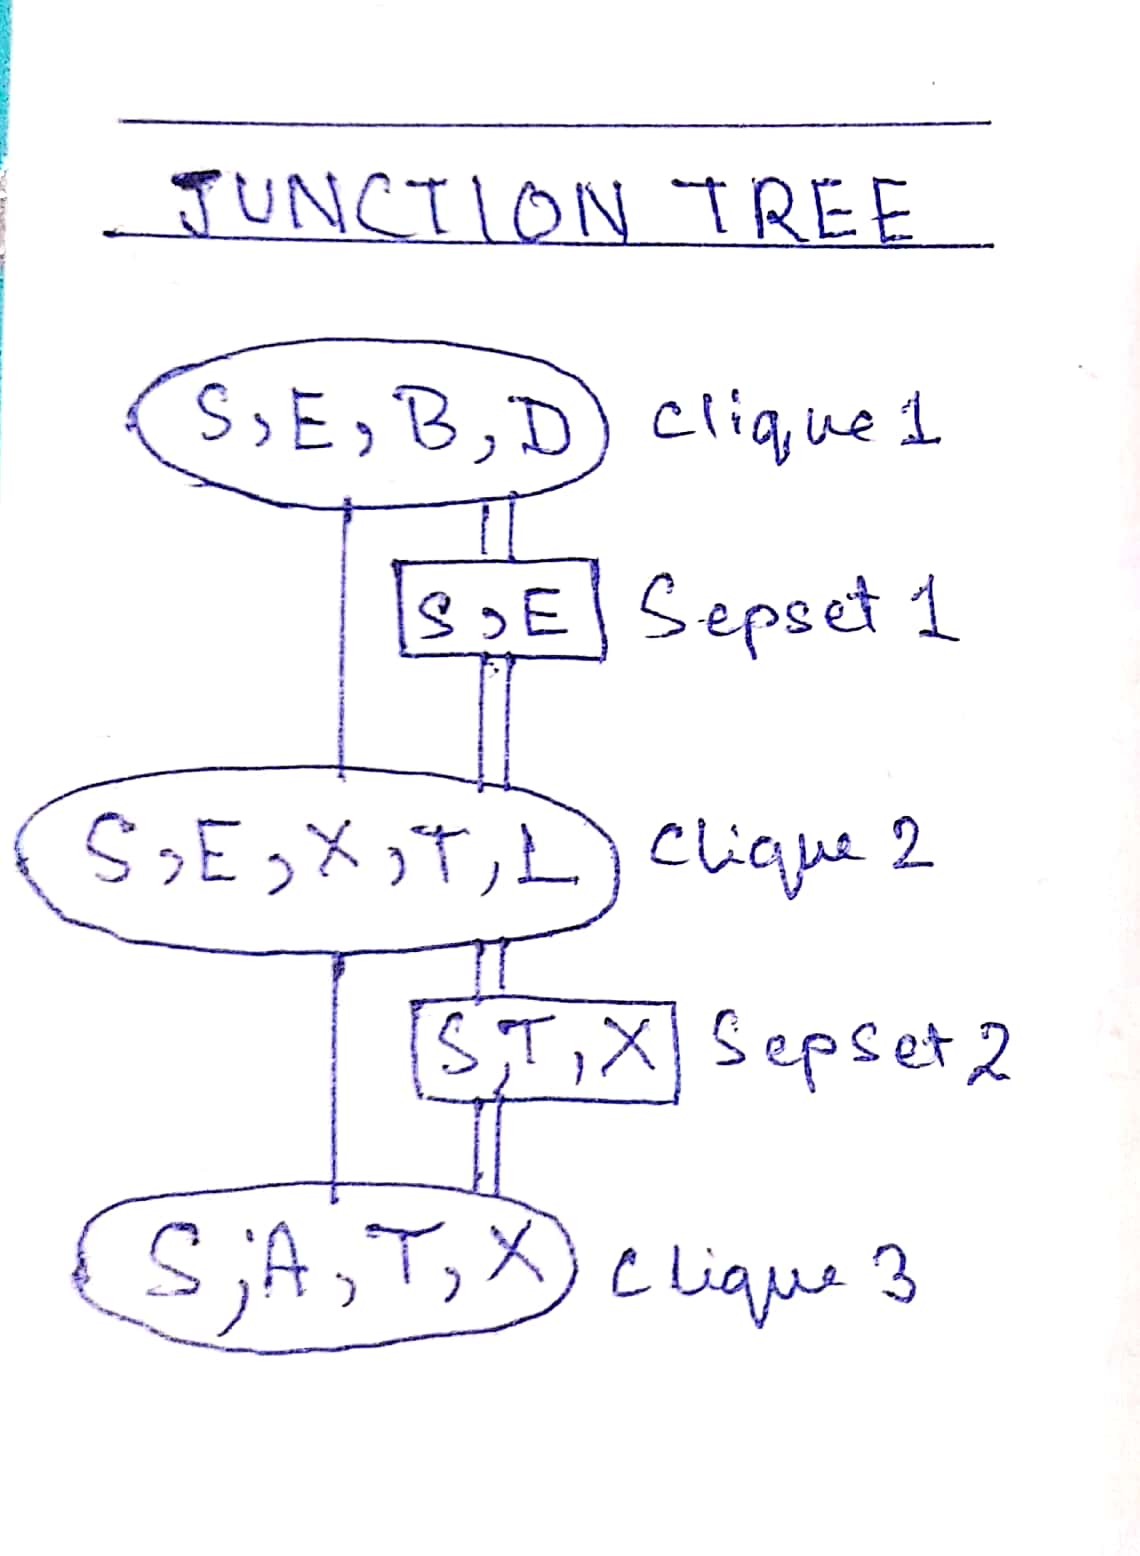

In [0]:
Image(filename = 'img.jpg', width = 400, height = 400)

The clusters from the junction tree are - 

##### Node 1 : {'smoke', 'either', 'bronc', 'dysp' }....... Common = {'smoke', 'either' }

##### Node 2 : {'smoke', 'either', 'xray', 'tub', 'lung'}...... Common = { 'smoke','tub','xray' }

##### Node 3 : { 'smoke', 'asia', 'tub', 'xray'}

The graph can be represented by the following equation - 

$$p(V ) = p(A) p(T | A) p(S) p(L | S) p(B | S) p(E | T, L) p(D | E, B) p(X | E)$$

The Joint Probabilty of the model can be given as - 

$$\Psi_{1}(S, E) = \sum_{B,D} p(B | S)p(D | E, B)$$<br>
$$\Psi_{2}(S,T, X) = \sum_{E,L} p(L | S) p(E | T, L) p(X | E) \Psi_{1}(S, E)$$ <br>
$$\Psi_{3} = \sum_{S,A,T,X,} p(S) p(A) p(T | A) \Psi_{2}(S,T, X)$$ <br>




First, the message passing will happen between Node 1 and 2. B,D are the only different element. 

$\therefore$ we sum over B,D -

## Iteration 1:

First, the message is sent from Node 1 to Node 2.<br><br>



## Iteration 2:<br><br>
Message is sent from Node 2 to Node 3.<br><br>
## Iteration 3:<br><br>
Message is sent from Node 3 to Node 1.<br><br>
## Iteration 4:<br><br>


### At the end of all message passing, we will only have the marginals. 
